<a href="https://colab.research.google.com/github/DavidPierre21/redes_neurais/blob/master/CNN/Rede_Neural_Lenet_e_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rede Neural Convolucional

### Nessa aula, vamos treinar a rede Neural VGG com a base de dados CIFAR-10

---

### 1. Carrega a Base de dados CIFAR-10

In [0]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

###2. Reescale as imagens dividindo todos os pixels por 255

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 3. Comece importando os pacotes necessários para o projeto

In [0]:
# import the necessary packages
#from pyimagesearch.nn.conv import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense

### 4.  Dividir base de dados em conjuntos de treinamento, teste e validação.

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


## MiniVGG

### 6. Construa o modelo MiniVGG

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_MiniVGG(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)# first CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(32, (3, 3), padding="same",
  input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(32, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # second CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model
  

### 7. Compile o modelo desejado (Lenet ou MiniVGG)

In [8]:
opt = SGD(lr=0.01)
model = build_MiniVGG(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2

### 8. Treine o Modelo

In [9]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 17s - loss: 2.3532 - acc: 0.2764 - val_loss: 1.6177 - val_acc: 0.4154

Epoch 00001: val_loss improved from inf to 1.61768, saving model to model.weights.best.hdf5
Epoch 2/20
 - 10s - loss: 1.7825 - acc: 0.3931 - val_loss: 1.6667 - val_acc: 0.4120

Epoch 00002: val_loss did not improve from 1.61768
Epoch 3/20
 - 10s - loss: 1.5553 - acc: 0.4546 - val_loss: 1.2892 - val_acc: 0.5434

Epoch 00003: val_loss improved from 1.61768 to 1.28925, saving model to model.weights.best.hdf5
Epoch 4/20
 - 10s - loss: 1.4178 - acc: 0.4987 - val_loss: 1.2021 - val_acc: 0.5704

Epoch 00004: val_loss improved from 1.28925 to 1.20212, saving model to model.weights.best.hdf5
Epoch 5/20
 - 10s - loss: 1.3144 - acc: 0.5339 - val_loss: 1.1429 - val_acc: 0.5912

Epoch 00005: val_loss improved from 1.20212 to 1.14291, saving model to model.weights.best.hdf5
Epoch 6/20
 - 10s - loss: 1.2393 - acc: 0.5591 

### 9. Carrege o modelo com a melhor acurácia no conjunto de validação

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### **10**. Calcule a acurácia no conjunto de teste

In [11]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7294


### **11**. Informações sobre acurácia no treinamento

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.75      0.76      0.75      1000
  automobile       0.88      0.84      0.86      1000
        bird       0.71      0.52      0.60      1000
         cat       0.56      0.51      0.53      1000
        deer       0.64      0.74      0.68      1000
         dog       0.61      0.64      0.62      1000
        frog       0.79      0.82      0.81      1000
       horse       0.83      0.76      0.80      1000
        ship       0.75      0.88      0.81      1000
       truck       0.79      0.83      0.81      1000

   micro avg       0.73      0.73      0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



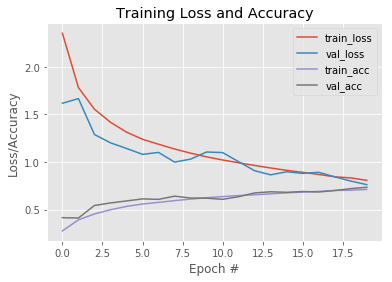

In [12]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## VGG16

In [0]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [19]:

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (32, 32, 3)

#Instantiate an empty model
model = Sequential([
Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
Conv2D(64, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(128, (3, 3), activation='relu', padding='same'),
Conv2D(128, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
Conv2D(512, (3, 3), activation='relu', padding='same',),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Flatten(),
Dense(4096, activation='relu'),
Dense(4096, activation='relu'),
Dense(10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)         295168    
__________

In [0]:
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

In [21]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 29s - loss: 2.3025 - acc: 0.1006 - val_loss: 2.3025 - val_acc: 0.0920

Epoch 00001: val_loss improved from inf to 2.30253, saving model to model.weights.best.hdf5
Epoch 2/20
 - 24s - loss: 2.3024 - acc: 0.1019 - val_loss: 2.3025 - val_acc: 0.1004

Epoch 00002: val_loss improved from 2.30253 to 2.30247, saving model to model.weights.best.hdf5
Epoch 3/20
 - 24s - loss: 2.3023 - acc: 0.1023 - val_loss: 2.3023 - val_acc: 0.0972

Epoch 00003: val_loss improved from 2.30247 to 2.30231, saving model to model.weights.best.hdf5
Epoch 4/20
 - 24s - loss: 2.3022 - acc: 0.1030 - val_loss: 2.3021 - val_acc: 0.0920

Epoch 00004: val_loss improved from 2.30231 to 2.30212, saving model to model.weights.best.hdf5
Epoch 5/20
 - 24s - loss: 2.3019 - acc: 0.1106 - val_loss: 2.3018 - val_acc: 0.0920

Epoch 00005: val_loss improved from 2.30212 to 2.30183, saving model to model.weights.best.hdf5
Epoch 6/20
 - 24s - loss: 2.3015 - acc: 0.1163 - v

In [22]:
model.load_weights('model.weights.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.3218


[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.47      0.35      0.41      1000
  automobile       0.35      0.67      0.46      1000
        bird       0.07      0.00      0.00      1000
         cat       0.23      0.04      0.07      1000
        deer       0.41      0.09      0.15      1000
         dog       0.26      0.43      0.33      1000
        frog       0.25      0.65      0.36      1000
       horse       0.36      0.40      0.38      1000
        ship       0.42      0.19      0.26      1000
       truck       0.37      0.40      0.38      1000

   micro avg       0.32      0.32      0.32     10000
   macro avg       0.32      0.32      0.28     10000
weighted avg       0.32      0.32      0.28     10000



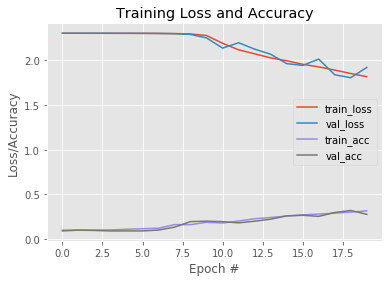

In [23]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## NewMiniVGG

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_NewMiniVGG(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)
  model.add(Conv2D(32, (3, 3), padding="same",
  input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # second CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(64, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(128, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # third CONV => RELU => CONV => RELU => CONV => RELU => POOL layer set
  model.add(Conv2D(256, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(512, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Conv2D(512, (3, 3), padding="same"))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

In [14]:
opt = SGD(lr=0.01)
model = build_NewMiniVGG(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [15]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.newvgg.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 31s - loss: 2.2214 - acc: 0.2943 - val_loss: 1.9029 - val_acc: 0.3396

Epoch 00001: val_loss improved from inf to 1.90289, saving model to model.weights.best.newvgg.hdf5
Epoch 2/20
 - 27s - loss: 1.6543 - acc: 0.4328 - val_loss: 2.0370 - val_acc: 0.3464

Epoch 00002: val_loss did not improve from 1.90289
Epoch 3/20
 - 27s - loss: 1.4191 - acc: 0.5059 - val_loss: 1.7863 - val_acc: 0.4274

Epoch 00003: val_loss improved from 1.90289 to 1.78635, saving model to model.weights.best.newvgg.hdf5
Epoch 4/20
 - 27s - loss: 1.2495 - acc: 0.5612 - val_loss: 1.2415 - val_acc: 0.5648

Epoch 00004: val_loss improved from 1.78635 to 1.24155, saving model to model.weights.best.newvgg.hdf5
Epoch 5/20
 - 27s - loss: 1.1236 - acc: 0.6027 - val_loss: 1.0701 - val_acc: 0.6128

Epoch 00005: val_loss improved from 1.24155 to 1.07011, saving model to model.weights.best.newvgg.hdf5
Epoch 6/20
 - 27s - loss: 1.0308 - acc: 0.6368 - val_loss: 1.1106 -

In [16]:
model.load_weights('model.weights.best.newvgg.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7857


[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.79      0.83      0.81      1000
  automobile       0.91      0.89      0.90      1000
        bird       0.77      0.64      0.70      1000
         cat       0.61      0.65      0.63      1000
        deer       0.64      0.86      0.73      1000
         dog       0.79      0.58      0.67      1000
        frog       0.77      0.90      0.83      1000
       horse       0.90      0.77      0.83      1000
        ship       0.88      0.89      0.89      1000
       truck       0.90      0.85      0.88      1000

   micro avg       0.79      0.79      0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



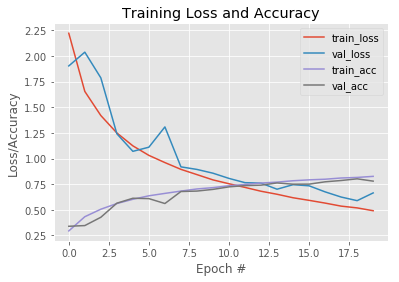

In [17]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## LeNet

In [0]:
def build_LeNet(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)

  # first set of CONV => RELU => POOL layers
  model.add(Conv2D(20, (5, 5), padding="same",
    input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # second set of CONV => RELU => POOL layers
  model.add(Conv2D(50, (5, 5), padding="same"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  # first (and only) set of FC => RELU layers
  model.add(Flatten())
  model.add(Dense(500))
  model.add(Activation("relu"))

  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

In [26]:
opt = SGD(lr=0.01)
model = build_LeNet(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 20)        1520      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 50)        25050     
_________________________________________________________________
activation_17 (Activation)   (None, 16, 16, 50)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 50)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
__________

In [27]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.lenet.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 4s - loss: 2.1323 - acc: 0.2310 - val_loss: 1.9765 - val_acc: 0.2982

Epoch 00001: val_loss improved from inf to 1.97647, saving model to model.weights.best.lenet.hdf5
Epoch 2/20
 - 3s - loss: 1.8795 - acc: 0.3365 - val_loss: 1.8076 - val_acc: 0.3622

Epoch 00002: val_loss improved from 1.97647 to 1.80760, saving model to model.weights.best.lenet.hdf5
Epoch 3/20
 - 3s - loss: 1.7299 - acc: 0.3911 - val_loss: 1.6473 - val_acc: 0.4214

Epoch 00003: val_loss improved from 1.80760 to 1.64732, saving model to model.weights.best.lenet.hdf5
Epoch 4/20
 - 3s - loss: 1.6179 - acc: 0.4258 - val_loss: 1.5443 - val_acc: 0.4474

Epoch 00004: val_loss improved from 1.64732 to 1.54434, saving model to model.weights.best.lenet.hdf5
Epoch 5/20
 - 3s - loss: 1.5279 - acc: 0.4603 - val_loss: 1.5213 - val_acc: 0.4628

Epoch 00005: val_loss improved from 1.54434 to 1.52130, saving model to model.weights.best.lenet.hdf5
Epoch 6/20
 - 3s - loss: 

In [29]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.lenet.hdf5')


# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5884


[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.76      0.55      0.64      1000
  automobile       0.73      0.76      0.74      1000
        bird       0.62      0.32      0.42      1000
         cat       0.54      0.18      0.28      1000
        deer       0.45      0.59      0.51      1000
         dog       0.43      0.68      0.53      1000
        frog       0.49      0.85      0.62      1000
       horse       0.78      0.56      0.65      1000
        ship       0.69      0.78      0.73      1000
       truck       0.70      0.62      0.65      1000

   micro avg       0.59      0.59      0.59     10000
   macro avg       0.62      0.59      0.58     10000
weighted avg       0.62      0.59      0.58     10000



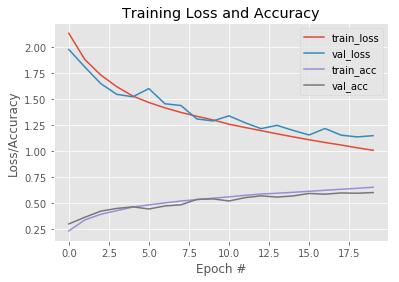

In [30]:

# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## NewAlexNet

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout

def build_NewAlexNet(width, height, depth, classes):
  # initialize the model
  model = Sequential()
  inputShape = (height, width, depth)
  model.add(Conv2D(32, (5, 5), input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Dropout(0.25))
  
  
  model.add(Conv2D(32, (5, 5)))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation("relu"))
  model.add(BatchNormalization(axis=2))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dense(512))
  model.add(Activation("relu"))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  
  # softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  model.summary()
  
  # return the constructed network architecture
  return model

In [32]:
opt = SGD(lr=0.01)
model = build_NewAlexNet(width=32, height=32, depth=3, classes=10)
model.compile(loss='categorical_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_21 (Activation)   (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 12, 12, 64)        48        
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
__________

In [33]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.newalexnet.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 7s - loss: 2.6481 - acc: 0.1885 - val_loss: 1.9870 - val_acc: 0.2732

Epoch 00001: val_loss improved from inf to 1.98701, saving model to model.weights.best.newalexnet.hdf5
Epoch 2/20
 - 5s - loss: 2.0482 - acc: 0.2839 - val_loss: 1.7134 - val_acc: 0.3710

Epoch 00002: val_loss improved from 1.98701 to 1.71341, saving model to model.weights.best.newalexnet.hdf5
Epoch 3/20
 - 5s - loss: 1.7931 - acc: 0.3501 - val_loss: 1.5400 - val_acc: 0.4438

Epoch 00003: val_loss improved from 1.71341 to 1.53999, saving model to model.weights.best.newalexnet.hdf5
Epoch 4/20
 - 5s - loss: 1.6184 - acc: 0.4089 - val_loss: 1.5127 - val_acc: 0.4562

Epoch 00004: val_loss improved from 1.53999 to 1.51274, saving model to model.weights.best.newalexnet.hdf5
Epoch 5/20
 - 5s - loss: 1.5138 - acc: 0.4468 - val_loss: 1.3650 - val_acc: 0.4956

Epoch 00005: val_loss improved from 1.51274 to 1.36502, saving model to model.weights.best.newalexnet.hdf5


In [34]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.newalexnet.hdf5')

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6244


[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.66      0.67      0.66      1000
  automobile       0.79      0.76      0.77      1000
        bird       0.44      0.61      0.51      1000
         cat       0.41      0.48      0.44      1000
        deer       0.62      0.49      0.55      1000
         dog       0.55      0.49      0.52      1000
        frog       0.58      0.83      0.68      1000
       horse       0.83      0.54      0.66      1000
        ship       0.77      0.75      0.76      1000
       truck       0.86      0.62      0.72      1000

   micro avg       0.62      0.62      0.62     10000
   macro avg       0.65      0.62      0.63     10000
weighted avg       0.65      0.62      0.63     10000



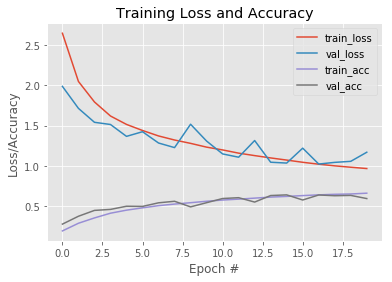

In [35]:
# evaluate the network
print("[INFO] evaluating network...")

# get predictions on the test set
predictions = model.predict(x_test, batch_size=128)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                  'horse', 'ship', 'truck']


print(classification_report(y_test.argmax(axis=1),
predictions.argmax(axis=1),
target_names=cifar10_labels))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), hist.history["loss"], label="train_loss" )
plt.plot(np.arange(0, 20), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), hist.history["acc" ], label="train_acc" )
plt.plot(np.arange(0, 20), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

##Exercício

1. Compare a arquitetura criada MiniVGG com a VGG16. Quais são as principais diferenças? Formule uma nova arquitetura VGG16.

2. Compare a arquitetura criada LENET com a AlexNet. Quais são as principais diferenças? Formule uma nova arquitetura da AlexNet.


---

1. A MiniVGG possui 32 filtros enquanto a VGG16 possui 64 filtros, também é observada que não há camadas convolutivas maiores que 128 filtros. Além do que na MiniVGG é utilizada uma camada de batch normalization após as camadas convolutivas e a ausência de camadas totalmente conectadas.

2. A LeNet possui 8 camadas e a AlexNet possui 15 camadas. A AlexNet já se inicializa com seus 96 filtros de tamanho 55x55 e, gradualmente, vai diminuindo o tamanho de seus filtros, mas aumentando a quantidade. Enquanto na LeNet vai aumentando o número de seus filtros sem modificar o tamanho, por exemplo: começa com 10 filtros de tamanho 5x5 e termina com 25 filtros de tamanho 5x5.